# Import Packages

In [1]:
import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


# Prepare Data From Mnist

In [2]:
(X_Train, Y_Train), (X_Test, Y_Test) = keras.datasets.mnist.load_data()
X_Train = X_Train.reshape(60000,28,28,1)
X_Test = X_Test.reshape(10000,28,28,1)
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

# Build &Train CNN Framework

In [3]:
Model = Sequential()
Model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
Model.add(Conv2D(32, kernel_size=3, activation="relu"))
Model.add(Flatten())
Model.add(Dense(10, activation="softmax"))
Model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [4]:
Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
Model.fit(X_Train, Y_Train, validation_data=(X_Test, Y_Test), epochs=3)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 206s 3ms/step - loss: 2.8206 - acc: 0.7999 - val_loss: 0.0861 - val_acc: 0.9757
Epoch 2/3
60000/60000 [==============================] - 213s 4ms/step - loss: 0.0687 - acc: 0.9798 - val_loss: 0.0710 - val_acc: 0.9780
Epoch 3/3
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0423 - acc: 0.9866 - val_loss: 0.1067 - val_acc: 0.9738


# Test Some Random Predictions

Was The AI Right? True


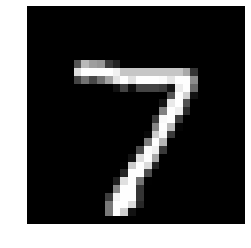

array([[1.04784226e-09, 1.07937400e-12, 6.47337695e-09, 2.08779793e-09,
        3.31481195e-18, 2.64270431e-13, 1.13021487e-19, 1.00000000e+00,
        4.43835628e-11, 1.02542246e-11]], dtype=float32)

In [5]:
i = 0
print("Was The AI Right?", np.argmax(Y_Test[[i]]) == np.argmax(Model.predict(X_Test[[i]])))
plt.axis("off")
plt.imshow(cv2.cvtColor(X_Test[i], cv2.COLOR_BGR2RGB))
plt.show()
Model.predict(X_Test[[i]])

# Test Against Drawings I've Made

Was The AI Right? True


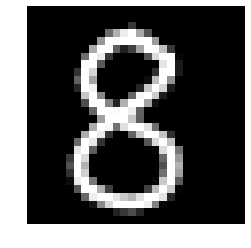

array([[3.1242699e-11, 1.2740153e-13, 3.3744630e-08, 3.0803171e-04,
        1.9878364e-14, 5.6412034e-07, 2.4946210e-12, 6.6925381e-16,
        9.9969137e-01, 5.4337929e-10]], dtype=float32)

In [6]:
i=8

import imageio
img = cv2.imread(('My Images',str(i)+'.png'),0)
img2 = cv2.bitwise_not(img)
img3 = img2.reshape(1,28,28,1)

print("Was The AI Right?", i == np.argmax(Model.predict(img3)))
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()
Model.predict(img3)